<a href="https://colab.research.google.com/github/kwakpovwe/kwakpovwe/blob/main/Maximizing_Operational_Performance_with_SKU_Clustering_Analysis_Insights_and_Recommendations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Run before Importing Kmeans

import os
os.environ['OMP_NUM_THREADS'] = '1'

In [ ]:
# Step 1: Load the Dataset
SKU_DATA = pd.read_csv('SKU DATA.csv')

In [ ]:
# Step 2: Verify the loaded dataset

SKU_DATA.head()  # View the first few rows of the dataset

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
0,1,0.058,547,9,2441.0,105.60,1.56,1920
1,2,0.954,547,0,0.0,207.68,1.00,384
2,3,2.385,547,12,23.0,165.78,1.02,108
3,4,5.100,547,0,0.0,221.04,1.05,72
4,5,0.000,547,0,0.0,0.00,0.00,0


In [ ]:
SKU_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2279 entries, 0 to 2278
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2279 non-null   int64  
 1   Unitprice        2279 non-null   float64
 2   Expire date      2279 non-null   int64  
 3   Outbound number  2279 non-null   int64  
 4   Total outbound   2279 non-null   float64
 5   Pal grossweight  2279 non-null   float64
 6   Pal height       2279 non-null   float64
 7   Units per pal    2279 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 142.6 KB


In [ ]:
SKU_DATA.describe()

,ID,Unitprice,Expire date,Outbound number,Total outbound,Pal grossweight,Pal height,Units per pal
count,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000,2279.000000
mean,1140.000000,4.269402,410.371654,235.976305,731.701053,192.939582,0.672798,755.563405
std,658.034953,14.449000,240.875419,700.230685,2146.029848,164.616813,0.552117,6278.437915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,570.500000,0.000000,365.000000,0.000000,0.000000,60.000000,0.000000,32.000000
50%,1140.000000,1.293800,547.000000,1.000000,3.000000,167.680000,0.840000,108.000000
75%,1709.500000,4.545000,547.000000,45.000000,419.500000,277.560000,1.020000,384.000000
max,2279.000000,518.592000,734.000000,6325.000000,26411.000000,907.200000,2.160000,200000.000000


                ID    Unitprice  Expire date  Outbound number  Total outbound  \
count  2279.000000  2279.000000  2279.000000      2279.000000     2279.000000   
mean   1140.000000     4.269402   410.371654       235.976305      731.701053   
std     658.034953    14.449000   240.875419       700.230685     2146.029848   
min       1.000000     0.000000     0.000000         0.000000        0.000000   
25%     570.500000     0.000000   365.000000         0.000000        0.000000   
50%    1140.000000     1.293800   547.000000         1.000000        3.000000   
75%    1709.500000     4.545000   547.000000        45.000000      419.500000   
max    2279.000000   518.592000   734.000000      6325.000000    26411.000000   

       Pal grossweight   Pal height  Units per pal  
count      2279.000000  2279.000000    2279.000000  
mean        192.939582     0.672798     755.563405  
std         164.616813     0.552117    6278.437915  
min           0.000000     0.000000       0.000000  
25%  

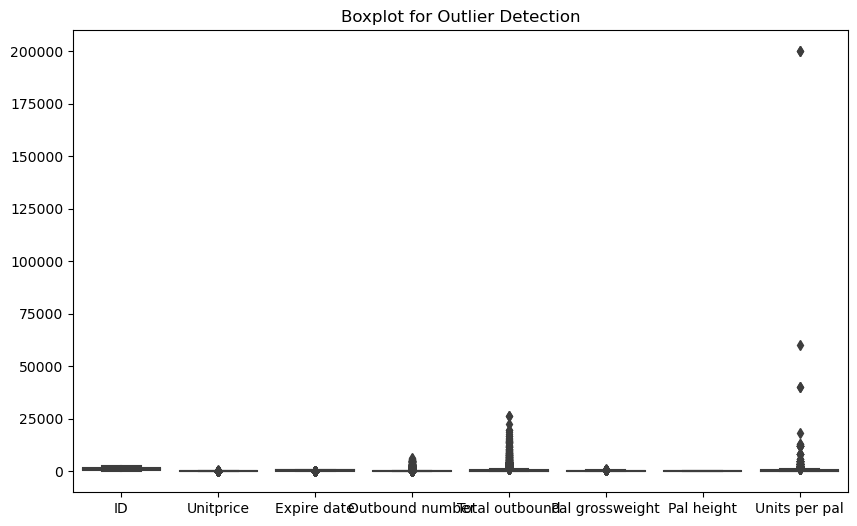

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming SKU_DATA is your DataFrame
# Display basic statistics of the dataset
print(SKU_DATA.describe())

# Plot boxplots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=SKU_DATA)
plt.title('Boxplot for Outlier Detection')
plt.show()


       Units per pal
count    2279.000000
mean      755.563405
std      6278.437915
min         0.000000
25%        32.000000
50%       108.000000
75%       384.000000
max    200000.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


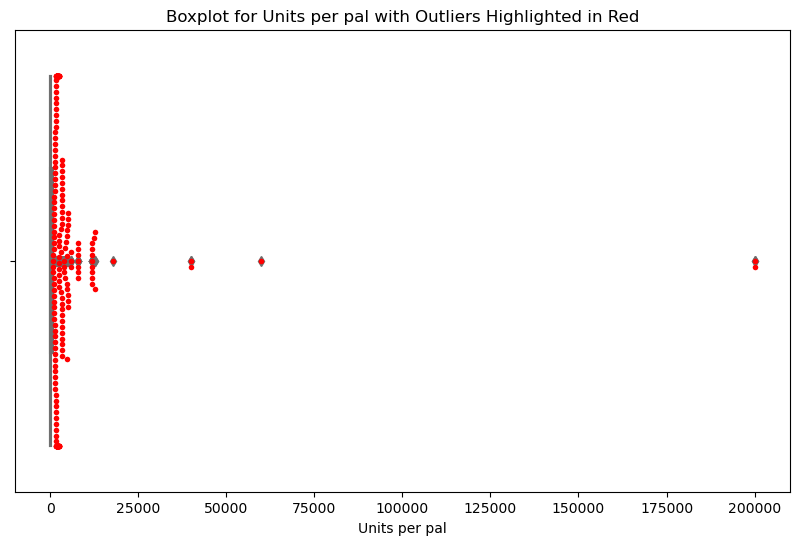

In [ ]:
#Studying the Outliers Further in the  Units per pal Column

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming SKU_DATA is your DataFrame
# Display basic statistics of the dataset
print(SKU_DATA[['Units per pal']].describe())

# Calculate IQR for the 'Units per pal' column
Q1 = SKU_DATA['Units per pal'].quantile(0.25)
Q3 = SKU_DATA['Units per pal'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((SKU_DATA['Units per pal'] < (Q1 - 1.5 * IQR)) | (SKU_DATA['Units per pal'] > (Q3 + 1.5 * IQR)))

# Create a boxplot with outliers highlighted in red
plt.figure(figsize=(10, 6))
sns.boxplot(x='Units per pal', data=SKU_DATA, color='skyblue')  # Set the color of the boxplot
sns.swarmplot(x=SKU_DATA['Units per pal'][outliers], color='red', marker='o', size=4)  # Reduce marker size
plt.title('Boxplot for Units per pal with Outliers Highlighted in Red')
plt.show()



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


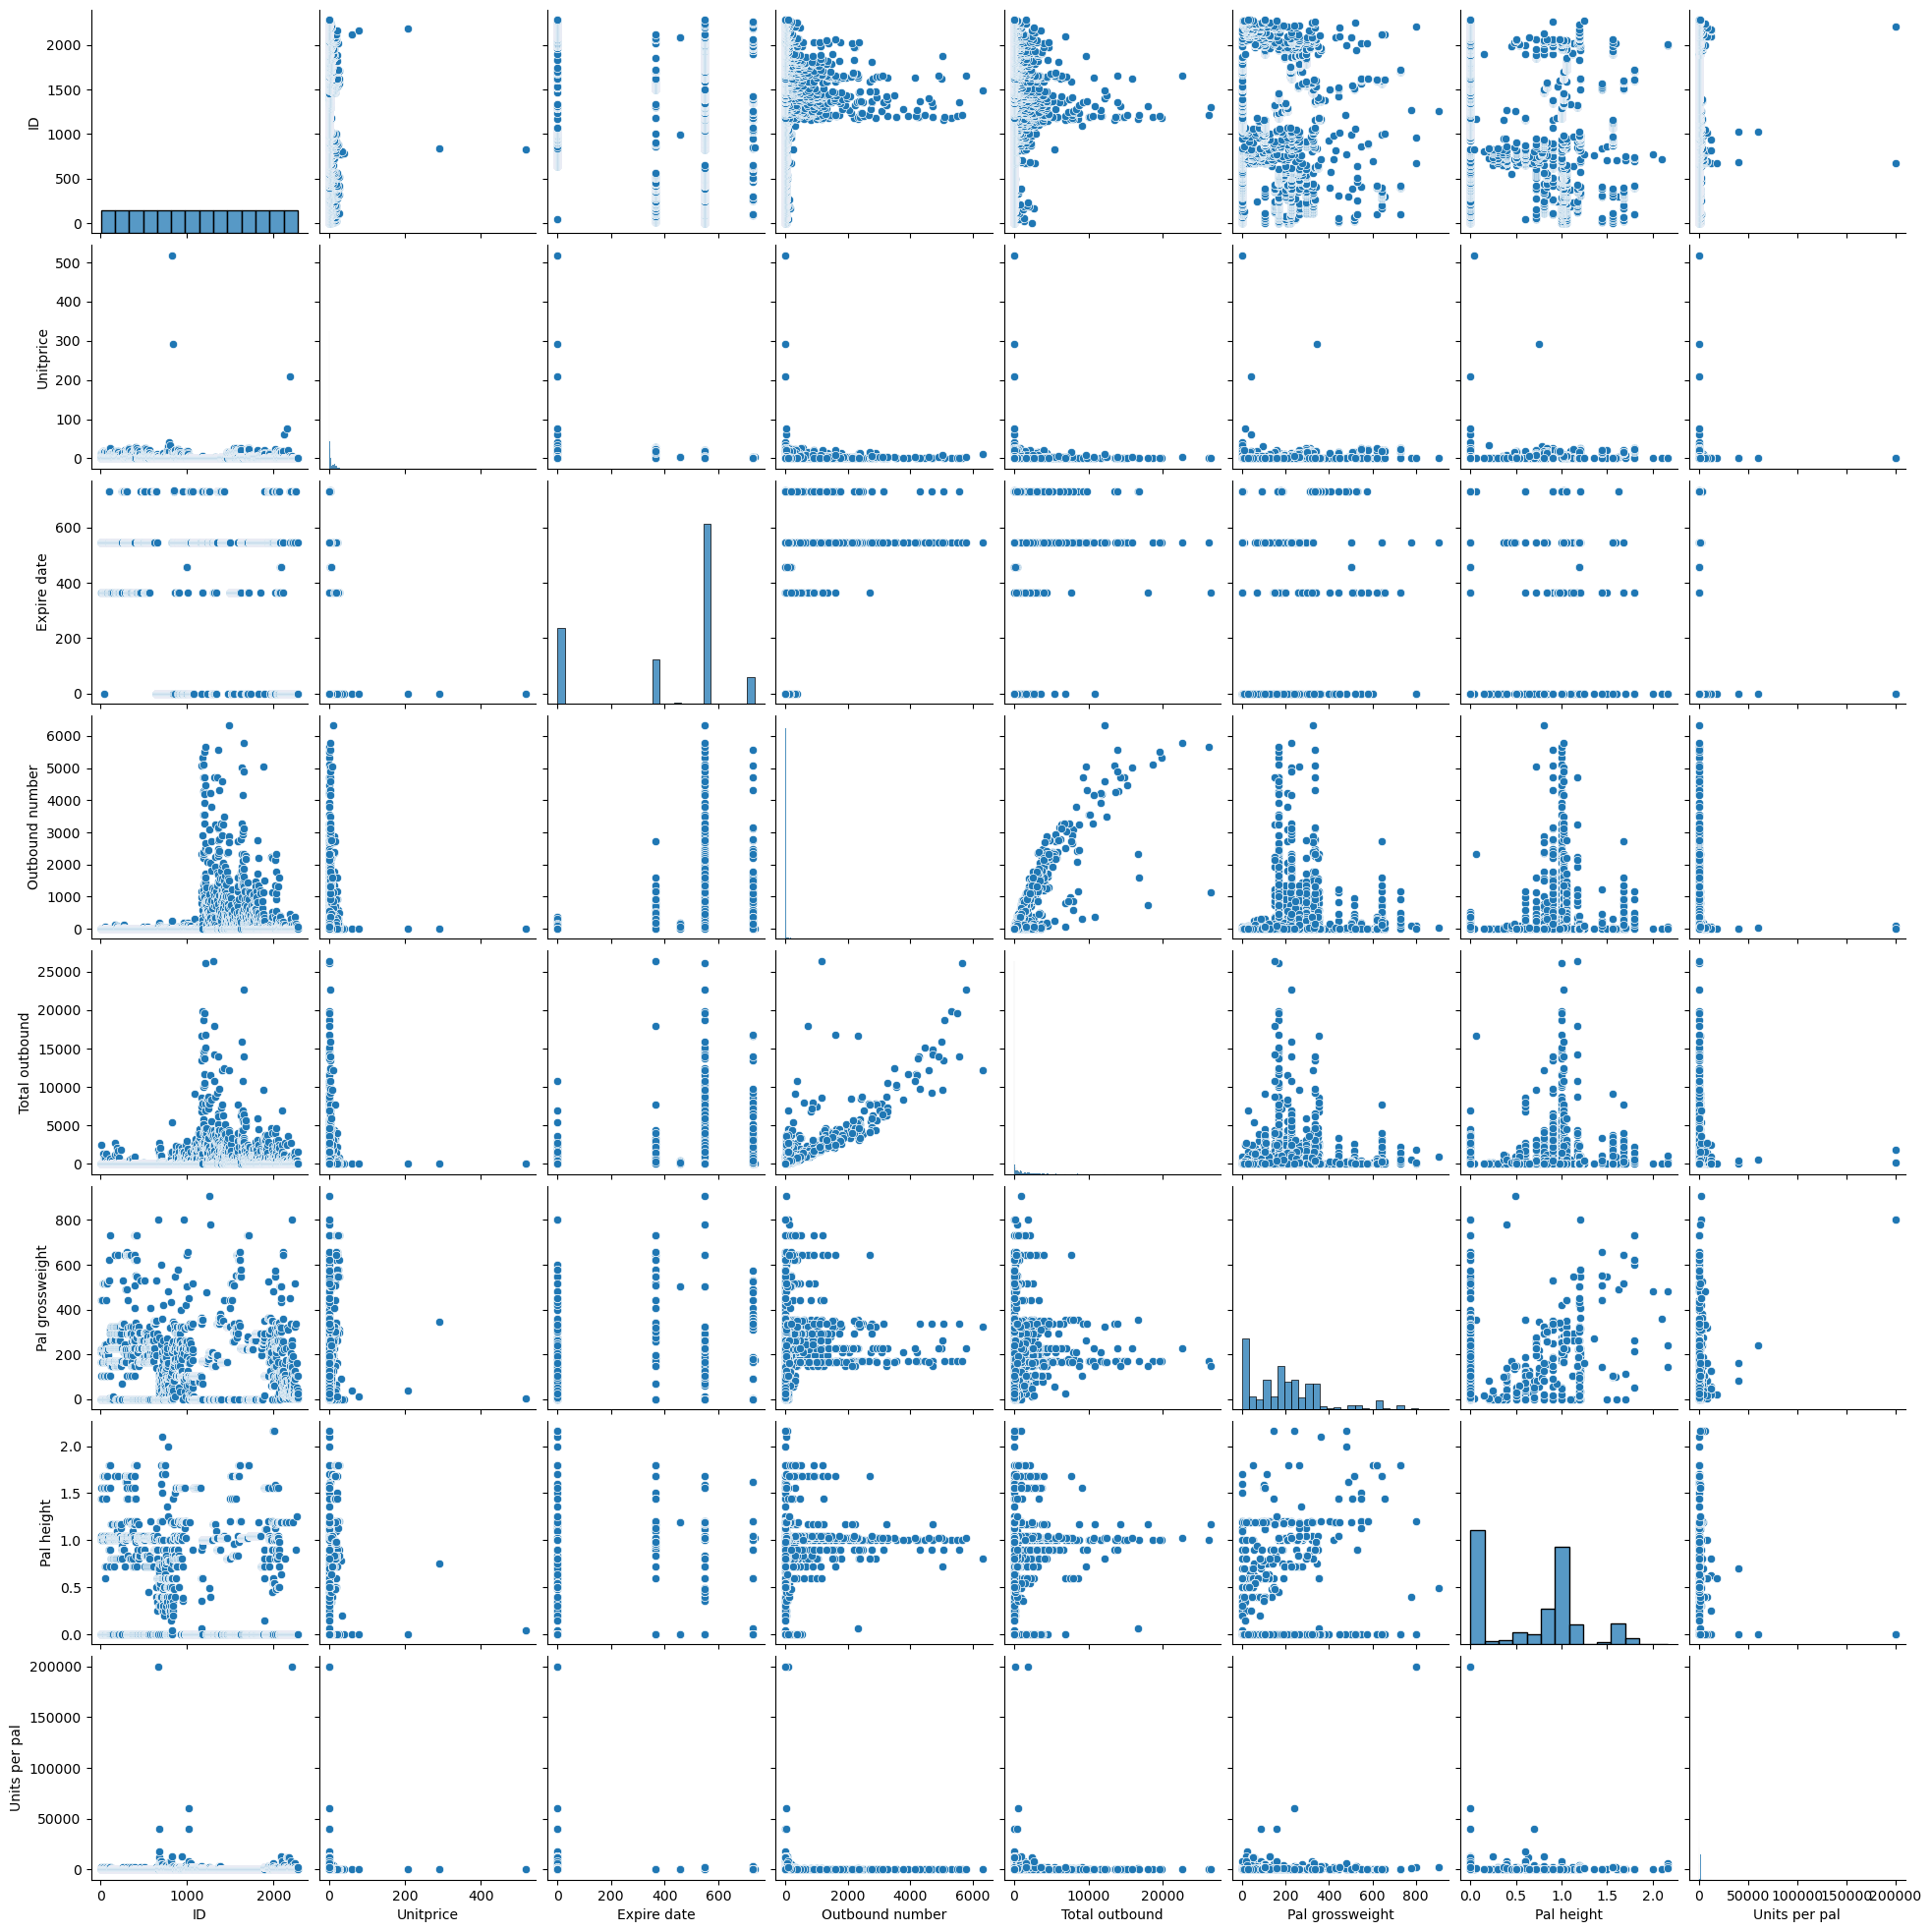

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Step 2: Create Pair Plot
sns.pairplot(SKU_DATA)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 2: Select Columns using iloc()
selected_columns = SKU_DATA.iloc[:,1 : 7]
# Select columns 2 (Unitprice) and 5 (Total outbound)

# Step 3: Scale the Selected Data

sc_X = StandardScaler()
scaled_data = sc_X.fit_transform(selected_columns)

In [ ]:
scaled_data

array([[-0.29153064,  0.56734029, -0.32421618,  0.79666836, -0.53067939,
         1.60726172],
       [-0.22950582,  0.56734029, -0.33707191, -0.3410305 ,  0.08956347,
         0.59276189],
       [-0.13044609,  0.56734029, -0.31993094, -0.33031069, -0.16502289,
         0.62899403],
       ...,
       [-0.29554564, -1.70404153, -0.33707191, -0.3410305 , -0.93923278,
        -1.21884495],
       [-0.29554564, -1.70404153, -0.3356435 , -0.34056442, -1.01974041,
        -1.21884495],
       [-0.29554564,  0.56734029, -0.22851243,  0.39071354, -0.53067939,
        -1.21884495]])

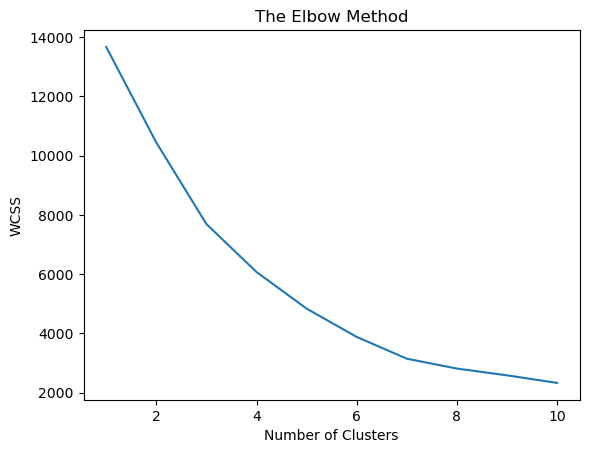

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

# Assuming you have your data in a variable scaled_data
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)  # Explicitly set n_init
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Fitting Kmeans to the Datset
kmeans = KMeans(n_clusters = 7, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
y_kmeans

array([0, 0, 0, ..., 1, 1, 3])

In [ ]:
#We need to reduce Dimensionality before we can visualize

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
scaled_data_reduced = pca.fit_transform(scaled_data)
pca.explained_variance_ratio_

array([0.35776729, 0.24535636])

In [ ]:
#We can see that over 70% of the original variance is explained by the two dimensions we have retained in our data.

sum(pca.explained_variance_ratio_)

0.6031236480733461

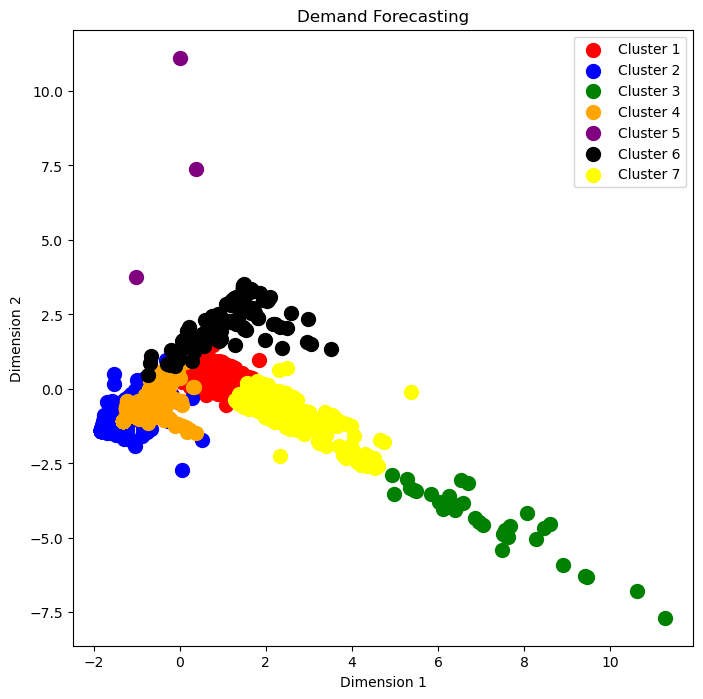

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the colors for the clusters
colours = ['red', 'blue', 'green', 'orange', 'purple', 'black', 'yellow']

# Create a figure and set the size
plt.figure(figsize=(8, 8))

# Plot the clusters
for i in range(7):
    plt.scatter(scaled_data_reduced[y_kmeans == i, 0], scaled_data_reduced[y_kmeans == i, 1],
                s=100, c=colours[i], label='Cluster ' + str(i + 1))

# Set the title and labels
plt.title('Demand Forecasting')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
#Fitting Kmeans(2) to the Datset
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


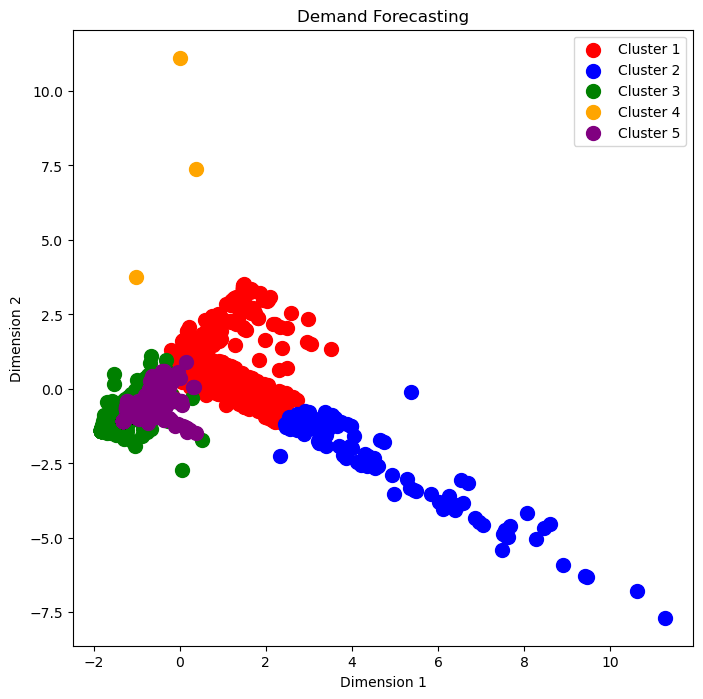

In [ ]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the colors for the clusters
colours = ['red', 'blue', 'green', 'orange', 'purple']

# Create a figure and set the size
plt.figure(figsize=(8, 8))

# Plot the clusters
for i in range(5):
    plt.scatter(scaled_data_reduced[y_kmeans2 == i, 0], scaled_data_reduced[y_kmeans2 == i, 1],
                s=100, c=colours[i], label='Cluster ' + str(i + 1))

# Set the title and labels
plt.title('Demand Forecasting')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')

# Show the legend
plt.legend()

# Show the plot
plt.show()

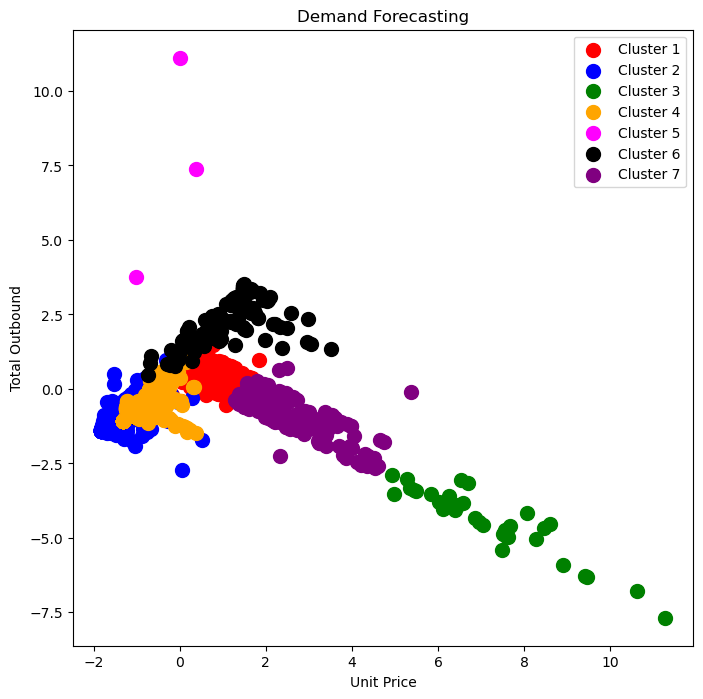

In [ ]:
from sklearn.cluster import KMeans

plt.figure(figsize=(8, 8))
plt.scatter(scaled_data_reduced[y_kmeans == 0, 0], scaled_data_reduced[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(scaled_data_reduced[y_kmeans == 1, 0], scaled_data_reduced[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(scaled_data_reduced[y_kmeans == 2, 0], scaled_data_reduced[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(scaled_data_reduced[y_kmeans == 3, 0], scaled_data_reduced[y_kmeans == 3, 1], s=100, c='orange', label='Cluster 4')
plt.scatter(scaled_data_reduced[y_kmeans == 4, 0], scaled_data_reduced[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')
plt.scatter(scaled_data_reduced[y_kmeans == 5, 0], scaled_data_reduced[y_kmeans == 5, 1], s=100, c='black', label='Cluster 6')
plt.scatter(scaled_data_reduced[y_kmeans == 6, 0], scaled_data_reduced[y_kmeans == 6, 1], s=100, c='purple', label='Cluster 7')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Demand Forecasting')
plt.xlabel('Unit Price')
plt.ylabel('Total Outbound')
plt.legend()
plt.show()

In [ ]:
# Metrics (Evaluating the Quality of our Cluaster using silhouette_score )
from sklearn import metrics
silhouette_score = metrics.silhouette_score(scaled_data, y_kmeans)

# Cluster characteristics
centroids = kmeans.cluster_centers_

# Homogeneity, key features etc.

#### 5. Interpret Clusters

# Lookup cluster id and map to product attributes
# Identify patterns, insights for inventory planning etc.

In [ ]:
centroids

array([[ 2.21641321e-02,  5.52955395e-01, -1.88479649e-01,
        -1.80079569e-01,  1.68182375e-01,  6.64088508e-01],
       [-1.90700237e-01, -1.70404153e+00, -3.22127624e-01,
        -2.48628946e-01, -7.23639682e-01, -6.30577955e-01],
       [-1.63806015e-01,  6.56984033e-01,  5.68096323e+00,
         6.34037660e+00,  8.69686394e-02,  5.38413686e-01],
       [-1.65421226e-01,  5.22530032e-01, -3.16383514e-01,
        -2.56727980e-01, -5.75067126e-01, -1.19930654e+00],
       [ 2.32009007e+01, -1.70404153e+00, -3.36119634e-01,
        -3.40564423e-01, -3.90525247e-01, -7.41788481e-01],
       [ 5.86261344e-01, -1.80027980e-01, -1.57894198e-01,
        -2.06446261e-01,  2.48452937e+00,  1.00592020e+00],
       [-8.35112452e-02,  6.89224902e-01,  2.08061988e+00,
         1.52113948e+00,  2.72460736e-01,  5.74297437e-01]])

Okay, let's go through an example of clustering this sample 6x2 array of data points using k-means:

Data preprocessing:
The data is already normalized, so no scaling needed.
No missing values or feature transformations needed for this simple data.
Determine number of clusters

In [ ]:
# K=3
kmeans3 = KMeans(n_clusters=3).fit(scaled_data)
clusters_k3 = kmeans3.labels_

# K=3
kmeans6 = KMeans(n_clusters=6).fit(scaled_data)
clusters_k6 = kmeans6.labels_

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


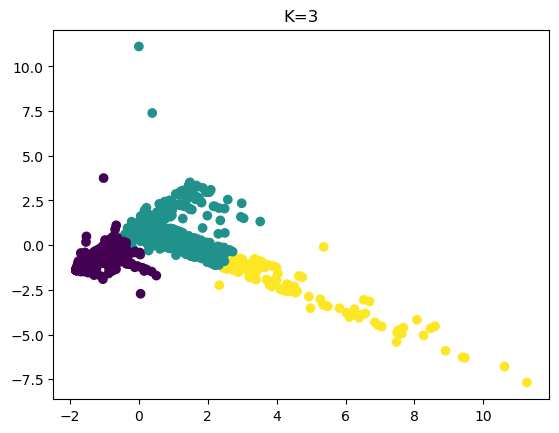

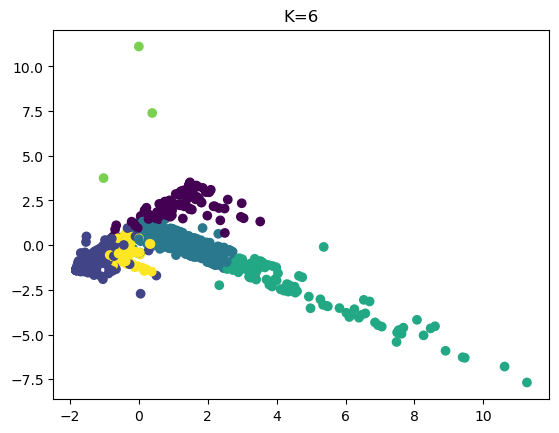

In [ ]:
#Visalize clusters

import matplotlib.pyplot as plt
plt.scatter(scaled_data_reduced[:,0], scaled_data_reduced[:,1], c=clusters_k3)
plt.title("K=3")

plt.figure()
plt.scatter(scaled_data_reduced[:,0], scaled_data_reduced[:,1], c=clusters_k6)
plt.title("K=6")
plt.show()

# Step 2: HIERARCHICAL

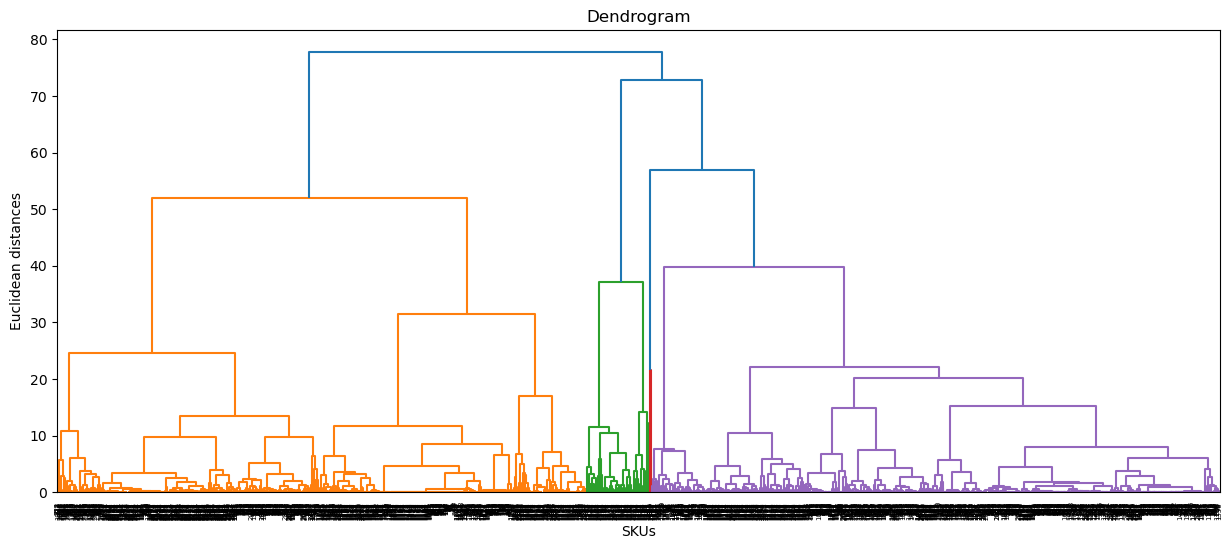

In [ ]:
#Using the Dendrogram to find the Optimal number of Clsuters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))

dendrogram = sch.dendrogram(sch.linkage(scaled_data, method ='ward'))
plt.title('Dendrogram')
plt.xlabel('SKUs')
plt.ylabel('Euclidean distances')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


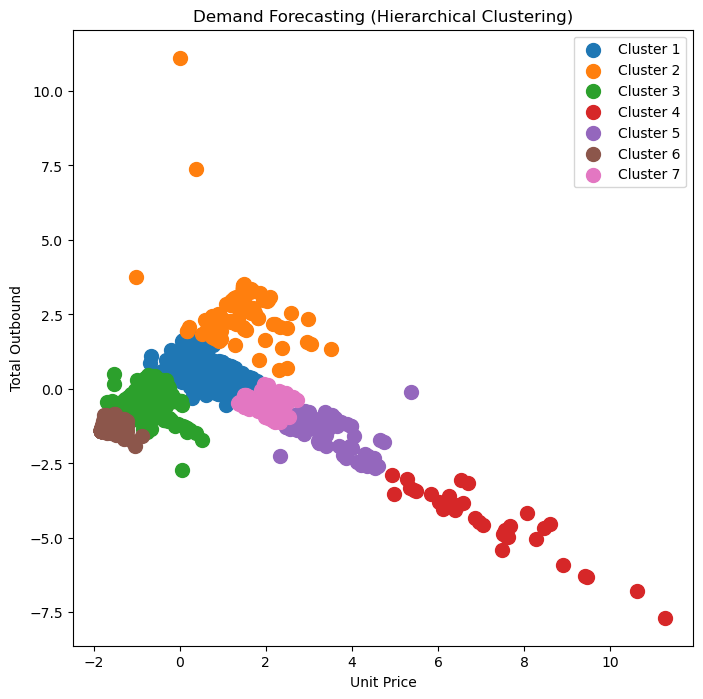

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Assuming hierarchical clustering is already performed and labels are obtained
# You can use AgglomerativeClustering with the appropriate parameters
# For example, linkage='ward' and n_clusters=desired_number_of_clusters

agg_cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
y_agg = agg_cluster.fit_predict(scaled_data_reduced)

# Plot the clusters
plt.figure(figsize=(8, 8))

for i in range(7):  # Update the range based on the number of clusters
    plt.scatter(scaled_data_reduced[y_agg == i, 0], scaled_data_reduced[y_agg == i, 1], s=100, label=f'Cluster {i + 1}')

plt.title('Demand Forecasting (Hierarchical Clustering)')
plt.xlabel('Unit Price')
plt.ylabel('Total Outbound')
plt.legend()
plt.show()


# Step 2: Calculate the distance or similarity matrix

In [ ]:
# Extract the relevant columns for clustering
#The chosen distance metric is Euclidean distance, and the pairwise distances are calculated using the pdist function from scipy.spatial.distance. The squareform function is then used to create the distance matrix.
#Finally, the distance matrix is printed to the console.


import pandas as pd
from scipy.spatial.distance import pdist, squareform

# Extract the relevant columns for clustering
data = SKU_DATA[['Unitprice', 'Expire date', 'Outbound number', 'Total outbound', 'Pal grossweight', 'Pal height', 'Units per pal']]

# Choose the distance metric (e.g., Euclidean distance)
distance_metric = 'euclidean'

# Calculate the pairwise distances
distances = pdist(data, metric=distance_metric)

# Create the distance matrix
distance_matrix = squareform(distances)

# Print the distance matrix
print(distance_matrix)

[[   0.         2885.87585367 3022.20190241 ... 3151.72185552
  3151.86342932  873.57451712]
 [2885.87585367    0.          280.36878956 ...  687.22643467
   691.16258219 2200.08959738]
 [3022.20190241  280.36878956    0.         ...  571.78718508
   575.00763258 2384.17225909]
 ...
 [3151.72185552  687.22643467  571.78718508 ...    0.
    13.36272801 2538.79148762]
 [3151.86342932  691.16258219  575.00763258 ...   13.36272801
     0.         2539.28388332]
 [ 873.57451712 2200.08959738 2384.17225909 ... 2538.79148762
  2539.28388332    0.        ]]


In [ ]:
import pandas as pd
import numpy as np

# Example distance matrix
distance_matrix = np.array([[0., 2885.87585367, 3022.20190241],
                            [2885.87585367, 0., 280.36878956],
                            [3022.20190241, 280.36878956, 0.]])

# Create a DataFrame from the distance matrix
distance_df = pd.DataFrame(distance_matrix)

# Print the distance matrix as a table
print(distance_df)

             0            1            2
0     0.000000  2885.875854  3022.201902
1  2885.875854     0.000000   280.368790
2  3022.201902   280.368790     0.000000


In [ ]:
#Fitting Hierarchical Clustering to the Dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters =6, affinity = 'euclidean', linkage ='ward')
y_hc = hc.fit_predict(scaled_data)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
y_hc

array([2, 2, 2, ..., 4, 4, 1], dtype=int64)

In [ ]:
type(SKU_DATA['Unitprice'])

pandas.core.series.Series

In [ ]:
SKU_DATA['Unitprice'] = SKU_DATA['Unitprice'].astype(float)
print(SKU_DATA.dtypes)

ID                   int64
Unitprice          float64
Expire date          int64
Outbound number      int64
Total outbound     float64
Pal grossweight    float64
Pal height         float64
Units per pal        int64
dtype: object


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming 'Unitprice', 'Pal grossweight', and 'Units per pal' are column names in scaled_data_reduced DataFrame

# Extract the scaled sales data for the cluster
sales_data = scaled_data["Unitprice"].values

# Split the data into training and testing sets
train_size = int(len(sales_data) * 0.8)
train_data, test_data = sales_data[:train_size], sales_data[train_size:]

# Time Series Forecasting (ARIMA)
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=len(test_data))

# Machine Learning Forecasting (Random Forest)
rf_model = RandomForestRegressor()
rf_model.fit(np.arange(len(train_data)).reshape(-1, 1), train_data)
forecast_rf = rf_model.predict(np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1))

# Evaluate the forecast accuracy (Mean Squared Error)
mse_arima = mean_squared_error(test_data, forecast_arima)
mse_rf = mean_squared_error(test_data, forecast_rf)

# Use the forecast for inventory planning and production optimization
demand_forecast_arima = model_fit.forecast(steps=12)  # Forecasting demand for the next 12 periods
demand_forecast_rf = rf_model.predict(np.arange(len(train_data), len(train_data) + 12).reshape(-1, 1))

# Inventory Planning and Production Optimization
inventory_level = scaled_data_reduced["Pal grossweight"].values  # Assuming the inventory level is in the "Pal grossweight" column
production_plan = scaled_data_reduced["Units per pal"].values  # Assuming the production plan is in the "Units per pal" column

optimal_inventory = inventory_level[-1] + np.sum(demand_forecast_arima)  # Adjust inventory based on ARIMA forecast
optimal_production = np.sum(demand_forecast_rf)  # Adjust production based on Random Forest forecast


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices